# **MSiA422 Homework2 Xiaoyun Gong**

# Analysis of different methods

First, let's try these two methods on different iterables: List, Tuple, and Disctionary. Then compare the first item of the output with the built-in sorted() function.

In [16]:
from hw2_xgk6328 import MySorted

In [17]:
##list, bubble
myList = [64, 34, 25, 12, 22, 11, 90]
my_list = MySorted() #initiate 
print("Bubble sort result:", my_list.bubble_sorted(myList, reverse = True))
sorted(myList, reverse = True) == my_list.bubble_sorted(myList, reverse = True)[0]

Bubble sort result: [[90, 64, 34, 25, 22, 12, 11], 21, 7, 3.695487976074219e-05]


True

In [18]:
##list, merge
print("Merge sort result:", my_list.merge_sorted(myList, reverse = True))
sorted(myList, reverse = True) == my_list.bubble_sorted(myList, reverse = True)[0]

Merge sort result: [[90, 64, 34, 25, 22, 12, 11], 9, 0, 3.7670135498046875e-05]


True

In [19]:
##tuple, bubble
myTuple = (1,2,3,4,1200,345,24)
my_tuple = MySorted() #initiate 
print("Bubble sort result:", my_tuple.bubble_sorted(myTuple))
sorted(myTuple) == my_tuple.bubble_sorted(myTuple)[0]

Bubble sort result: [[1, 2, 3, 4, 24, 345, 1200], 21, 3, 2.5987625122070312e-05]


True

In [ ]:
##tuple, merge
print("Merge sort result:", my_tuple.merge_sorted(myTuple))
sorted(myTuple) == my_tuple.bubble_sorted(myTuple)[0]

Merge sort result: [[1, 2, 3, 4, 24, 345, 1200], 10, 0, 4.0531158447265625e-05]


True

In [20]:
##Dict, bubble
myDict = {'X':100, 'Y':10000, 'Z':1000000, 'A': 2, 'B':1}
my_dict = MySorted() #initiate 
print("Bubble sort result:", my_dict.bubble_sorted(myDict))
sorted(myDict) == my_dict.bubble_sorted(myDict)[0]

Bubble sort result: [['A', 'B', 'X', 'Y', 'Z'], 10, 6, 2.6464462280273438e-05]


True

In [21]:
##Dict, merge
print("Merge sort result:", my_dict.merge_sorted(myDict))
sorted(myDict) == my_dict.bubble_sorted(myDict)[0]

Merge sort result: [['A', 'B', 'X', 'Y', 'Z'], 8, 0, 3.528594970703125e-05]


True

In [22]:
## test case tuples
studentTuple = [('john', 'C', 15), ('jane', 'B', 12), ('dave', 'B', 10)]
my_studentTuple = MySorted()
my_studentTuple.merge_sorted(studentTuple, key = lambda student: student[1])

[[('jane', 'B', 12), ('dave', 'B', 10), ('john', 'C', 15)],
 3,
 0,
 1.52587890625e-05]

In [23]:
sorted(studentTuple, key = lambda student: student[1])

[('jane', 'B', 12), ('dave', 'B', 10), ('john', 'C', 15)]

Let's randomly generate some a list with num_case of ramdomly generated lists in it. 

In [24]:
import random
def generator(n):
    ls = []
    for i in range(n):
        ls.append(random.randint(1,200)) 
    return ls

N = [100,200, 500, 1000,10000]
testlist = []
for n in N:
    testlist.append(generator(n))

# for i in range(num_case):
#     ls = []
#     for j in range(random.randint(1,100)): ## this range is the range of the length of each list
#         ls.append(random.randint(1,70)) ## this range is the range of individual number within the least
#     testlist.append(ls)

In [28]:
### create a list to save runtime of the bubble method over the test cases. 
testtime_bubble = []
for i in range(len(testlist)):
    test = MySorted()
    ls = test.bubble_sorted(testlist[i])
    testtime_bubble.append(ls[-1])

In [27]:
### create a list to save runtime of the merge method over the test cases. 
testtime_merge = []
for i in range(len(N)):
    test = MySorted()
    ls = test.merge_sorted(testlist[i])
    testtime_merge.append(ls[-1])
# testtime_merge

In [26]:
import time
### create a list to save runtime of the built-in sorted() method over the test cases. 
testtime_builtin = []
for i in range(len(N)):
    starting_time = time.time()
    sorted(testlist[i])
    ending_time = time.time()
    runTime = ending_time - starting_time
    #time = time.time(sorted(testlist[i]))
    testtime_builtin.append(runTime)

With all of the runtime data collected, let's plot it.

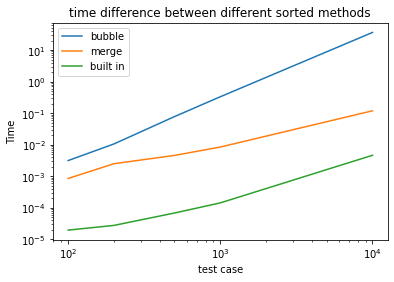

In [29]:
import matplotlib.pyplot as plt
import math
#x = range(num_case)
x = N
k1 = testtime_bubble
k2 = testtime_merge
k3 = testtime_builtin
plt.plot(x, k1, label = "bubble")
plt.plot(x, k2, label = "merge")
plt.plot(x, k3, label = "built in")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("test case")
plt.ylabel("Time")
plt.legend(loc = "best")
plt.title("time difference between different sorted methods")
plt.show()

The plot above is not so helpful as there are so many individual cases and there are outliers all the time. However, we can still see that in general, bubble method has longer runtime. 

To better understand, let's create a table with some summary info. 

In [ ]:
# longest_time= {'bubble': 0, 'merge': 0, 'builtin': 0}
# for i in range(num_case):
#   if testtime_bubble[i] > testtime_merge[i] and testtime_bubble[i] > testtime_builtin[i]:
#     longest_time['bubble'] += 1
#   elif testtime_merge[i] > testtime_bubble[i] and testtime_merge[i] > testtime_builtin[i]:
#     longest_time['merge'] += 1
#   else:
#     longest_time['builtin'] += 1
# # print(longest_time)

# shortest_time= {'bubble': 0, 'merge': 0, 'builtin': 0}
# for i in range(num_case):
#   if testtime_bubble[i] < testtime_merge[i] and testtime_bubble[i] < testtime_builtin[i]:
#     shortest_time['bubble'] += 1
#   elif testtime_merge[i] < testtime_bubble[i] and testtime_merge[i] < testtime_builtin[i]:
#     shortest_time['merge'] += 1
#   else:
#     shortest_time['builtin'] += 1
# # print(shortest_time)

In [30]:
import pandas as pd
N_100 = pd.Series({'bubble': testtime_bubble[0], 'merge': testtime_merge[0], 'builtin': testtime_builtin[0]})
N_200 = pd.Series({'bubble': testtime_bubble[1], 'merge': testtime_merge[1], 'builtin': testtime_builtin[1]})
N_500 = pd.Series({'bubble': testtime_bubble[2], 'merge': testtime_merge[2], 'builtin': testtime_builtin[2]})
N_1000 = pd.Series({'bubble': testtime_bubble[3], 'merge': testtime_merge[3], 'builtin': testtime_builtin[3]})
N_10000 = pd.Series({'bubble': testtime_bubble[4], 'merge': testtime_merge[4], 'builtin': testtime_builtin[4]})
data = pd.DataFrame({'N = 100': N_100, 'N = 200': N_200, 'N = 500': N_500, 'N = 1000': N_1000, 'N = 10000': N_10000})
data

,N = 100,N = 200,N = 500,N = 1000,N = 10000
bubble,0.003154,0.010609,0.077903,0.331604,36.051617
merge,0.000855,0.002509,0.004595,0.008462,0.118923
builtin,0.000020,0.000028,0.000069,0.000144,0.004641
